# Project 01: Knocking the Moon out of Orbit
**Name:** Linus Widmer

## Research Question

Assume a large asteroid collides with Earth's moon. What would the speed of the asteroid need to be to be to make the moon escape Earth's orbit?
The following key assumptions are made:
- Asteroid is assumed to have a mass of approximately $10^{20}$ kg. This is approximately one nineth of the mass of Ceres, one of the largest known asteroids [2].
- The asteroid hits the moon in the centre of it's surface at a given angle (more below).
- The collision is assumed to be either perfectly inelastic or partially inelastic.
    - When assumed to be perfectly inelastic, this means the asteroid-moon system "melts" (asteroid gets destroyed) into one structure without significant loss of mass as a result of the high speed impact (moon does not break apart).
    - The parameters can be changed such that the collision is only partially inelastic. That means a certain fraction of the asteroid's mass does melt into the new moon-asteroid system but some of it will break apart in the collision into many smaller rocks. These rocks are assumed to spread uniformly in the dimension perpendicular to the impact angle (which means on average the velocity of the debris in that dimension is 0), but possibly with some average velocity in the direction the asteroid came from. The code will check that linear kinetic energy does not increase after impact as that would not be possible in any kind of collision.
- Different impact angles will be analysed to see how fast an asteroid needs to be to escape Earth's orbit for each case.
- Rotational motion will not be considered in this simulation as it does not affect the moon-asteroid system's trajectory after impact. This is because linear momentum will always be conserved seperately from angular momentum.

From theoretical physics we know that the new moon-asteroid system may escape orbit if the total system's velocity is $\left(\sqrt{2}v_{moon}\right)$ immediately after impact. This velocity may point in any direction as long as the system does not collide with Earth.

### Orbit Calculation and Visualisation

- The following code cells define parameters, model orbital planes, and model the orbital paths before impact.
- The second and third to last code cell of this series calculate and visualise the orbital path and determine whether the new moon-asteroid system escapes Earth's orbit.
    - In my simulation, a system is considered to have escaped Earth's orbit if no "break" condition is met within 40 times the moon's orbital period. Some experimentation has shown that the new system usually should have completed at least one orbit at that point at which point a "break" condition should stop the Euler propagation of the trajectory.
    - The two break conditions seek to determine whether a system has completed a full orbital cycle. At the point of collision, the system is at position $y=0$ and $x=r_{Moon}$. The break conditions are activated if $x$ is positive and $y$ changes sign which can only occur once the system has completed one full orbit even if it is not exactly in the same place (as errors introduced by the Euler method will result in the system never reaching the exact point of collision again).
- The last code cell of this series runs the simulation multiple times to automatically find the initial asteroid velocity which knocks the moon out of orbit with the given variables.

### Variables to analyse

- **$\theta$ (theta):**

  $\theta$ [degrees] represents the angle of the asteroid's velocity in the moon's orbital plane. $\theta = 0°$ means the component of the asteroid's velocity in the moon's orbital plane is in the same direction as the moon's orbital velocity at that time. Accepted values are between $0°$ and $360°$.

- **$\phi$ (phi):**

  $\phi$ [degrees] represents the angle from the asteroid's velocity vector to the moon's orbital plane. $\phi = 0°$ means the asteroid is travelling in the moon's orbital plane. Accepted values are between $-90°$ and $90°$.

- **$M_{elastic}$ (mass_elastic):**

  $M_{elastic}$ represents the fraction of the asteroid's mass that does not melt together with the moon but instead get's scattered. Accepted values are between 0 and 1.

- **$v_{elastic}$ (vel_elastic):**

  $v_{elastic}$ represents the average velocity of the scattered debris in the negative asteroid's velocity direction as a fraction of $v_{asteroid}$. Technically, the debris could also move in the positive asteroid's direction but as the new moon-asteroid system moves so much slower than the asteroid's velocity after impact, the debris can't really move in the positive asteroid's velocity direction at a non-negligible multiple of $v_{asteroid}$ without immeadiately colliding with the moon again. Accepted values are between 0 and 1.

### Linear Momentum Conservation during Collision

The momentum is conserved during collision:
$$\vec{p}_{Moon} + \vec{p}_{Asteroid} = \vec{p}_{Moon–Asteroid} + \vec{p}_{scatter}$$
After the collision the fraction of the asteroid sticking to the moon is $(1-M_{elastic})M_a$ which means:
$$\vec{p}_{Moon–Asteroid} = (M_m + (1-M_{elastic})M_a) \vec{v}_{ma}$$
And the scattered mass ($ M_{elastic}M_a$) is scattered at a speed ($v_{elastic}(-\vec{v}_a)$):
$$\vec{p}_{scatter} =  -M_{elastic}M_a v_{elastic}\vec{v}_a$$
This means the overall momentum equation can be described as follows:
$$M_m \vec{v}_m + M_a \vec{v}_a = (M_m + (1-M_{elastic})M_a) \vec{v}_{ma} - M_{elastic}M_a v_{elastic}\vec{v}_a$$
As such the velocity of the Moon-Asteroid system after the collision can be calculated with the following equation:
$$\vec{v}_{ma} = \frac{M_m \vec{v}_m + M_a \vec{v}_a + M_{elastic}M_a v_{elastic}\vec{v}_a}{M_m + (1-M_{elastic})M_a}$$
This equation is used individually for momentum conservation in the $\hat{i}\ (x)$, $\hat{j}\ (y)$ and $\hat{k}\ (z)$ direction.

### Constants

- $M_{Earth} = 5.9724\times10^{24}$ kg (Earth's Mass) [1]
- $R_{Earth} = 6371\times10^3$ m (Earth's Radius) [1]
- $G = 6.67430\times10^{-11}\ \mathrm{N\ m^2\ kg^{-2}}$ (Gravitational constant)
- $M_a = 10^{20}$ kg (Asteroid mass around one nineth of Ceres' mass) [2]
- $M_m = 7.346\times10^{22}$ kg (Moon's Mass) [1]
- $R_{m, peri} = 3.632289\times10^8$ m (Orbital distance of the moon at perigee) [1]
- $a_m = 3.84748\times10^8$ m (Semi-major axis of moon's orbit) [1]
- $v_{m, peri} = \sqrt{GM\left(\frac{2}{R_{m,peri}}-\frac{1}{a_m}\right)}$ (Velocity of the moon at perigee according to the Vis Viva equation for elliptical orbits, credit ASTR200)
- $P_m = 27.5$ days (orbital period of the moon) [3]
- $v_{esc} = \sqrt{2}v_{m,peri}$ (Theoretical escape velocity to escape Earth's gravity from the point of collision, credit ASTR200)

## Simulation Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M_earth = 5.9724*10**24   # Mass of Earth [kg]
R_earth = 6371e3          # Radius of Earth [m]
G = 6.67430*10**(-11)     # Gravitational Constant G [Nm^2/kg^2]
M_a = 10**20              # Mass of asteroid [kg]
M_m = 7.346*10**22        # Mass of moon [kg]
R_m_peri = 3.632289*10**8 # Orbital distance of moon at perigee [m]
semi_major_m = 3.84748*10**8 # Semi-major axis of moon [m]
v_m_peri = (G*M_earth*(2/R_m_peri-1/semi_major_m))**(1/2)   # Orbital velocity at perigee using vis-viva [m/s]
P_moon = 27.5*3600*24  # Orbital period of moon [s]

In [3]:
#### Calculate theoretical velocity needed for the asteroid in a given direction

v_esc = np.sqrt(2) * v_m_peri      # the velocity of the system required to escape Earth's gravity immediately after collision
                                   # As studied in ASTR200 this velocity can be in any direction

In [4]:
### Orbital plane moon
def orbital_plane_moon(dim):
    xx, yy = np.meshgrid(np.linspace(-dim, dim, 100), np.linspace(-dim, dim, 100))
    zz = np.zeros_like(xx)
    return xx, yy, zz

In [5]:
def orbital_plane_finalsys(dim, initial_vel_vec, final_vel_vec):
    vxi, vyi, vzi = initial_vel_vec
    vxf, vyf, vzf = final_vel_vec
    # Normal vec to the two vel vecs (cross multiply the two velocity vecs)
    Nx = vyi * vzf - vzi * vyf
    Ny = vzi * vxf - vxi * vzf
    Nz = vxi * vyf - vyi * vxf

    xx, yy = np.meshgrid(np.linspace(-dim, dim, 10), np.linspace(-dim, dim, 10))
    zz = (-Nx * (xx - R_m_peri) - Ny * yy) / Nz
    return xx, yy, zz

In [6]:
def earth():
    ### Plotting Earth
    
    u = np.linspace(0, 2 * np.pi, 1000)
    v = np.linspace(0, np.pi, 1000)
    x_earth = R_earth * np.outer(np.cos(u), np.sin(v))
    y_earth = R_earth * np.outer(np.sin(u), np.sin(v))
    z_earth = R_earth * np.outer(np.ones(np.size(u)), np.cos(v))

    return x_earth, y_earth, z_earth

In [7]:
### Model orbit of moon

t = P_moon
steps = 1000000
x = R_m_peri
y = 0
v_x = 0
v_y = v_m_peri
dt = t/steps

x_moon = [x]
y_moon = [y]

for i in range(steps):
    # Given that we know (v_x, v_y) at point (x,y), what are our new point (x_new,y_new)
    x_new = x + v_x * dt
    y_new = y + v_y * dt

    # Calculate acceleration at our initial point (x,y)
    r_abs = (x**2+y**2)**(1/2)
    x_comp_r = x/r_abs
    y_comp_r = y/r_abs
    a_x = -G*M_earth/r_abs**2 * x_comp_r
    a_y = -G*M_earth/r_abs**2 * y_comp_r

    # Calculate velocity at our new point (x_new, y_new) using (a_x, y_x)
    v_x_new = v_x + a_x * dt
    v_y_new = v_y + a_y * dt

    # Append the new position values of the moon
    x_moon.append(x_new)
    y_moon.append(y_new)

    # Set the new position and velocity values as the current ones for the next iteration
    x = x_new
    y = y_new
    v_x = v_x_new
    v_y = v_y_new

    # break after one complete rotation, when y switches from + to -
    if y_moon[-2]<0 and y_moon[-1]>0:
        break


x_earth, y_earth, z_earth = earth()

In [8]:
### Model trajectory of asteroid before impact (using backwards Euler method)

def asteroid_backwards(v_a, theta, phi, dim = 6e8, show_plot=False):

        
    v_a_x = v_a * np.sin(np.radians(theta))*np.cos(np.radians(phi))
    v_a_y = v_a * np.cos(np.radians(theta))*np.cos(np.radians(phi))
    v_a_z = v_a * np.sin(np.radians(phi))
    
    t = P_moon/5
    steps = 1000000
    x = R_m_peri
    y = 0
    z = 0
    v_x = - v_a_x
    v_y = - v_a_y
    v_z = - v_a_z
    dt = t/steps
    
    x_asteroid = [x]
    y_asteroid = [y]
    z_asteroid = [z]
    
    for i in range(steps):
        # Given that we know (v_x, v_y, v_z) at point (x,y,z), what are our new point (x_new,y_new,z_new)
        x_new = x + v_x * dt
        y_new = y + v_y * dt
        z_new = z + v_z * dt
    
        # Calculate acceleration at our initial point (x,y,z)
        r_abs = (x**2+y**2+z**2)**(1/2)
        x_comp_r = x/r_abs
        y_comp_r = y/r_abs
        z_comp_r = z/r_abs
        a_x = -G*M_earth/r_abs**2 * x_comp_r
        a_y = -G*M_earth/r_abs**2 * y_comp_r
        a_z = -G*M_earth/r_abs**2 * z_comp_r
    
        # Calculate velocity at our new point (x_new, y_new,z_new) using (a_x, a_y,a_z)
        v_x_new = v_x + a_x * dt
        v_y_new = v_y + a_y * dt
        v_z_new = v_z + a_z * dt
    
        # Append the new position values of the asteroid
        x_asteroid.append(x_new)
        y_asteroid.append(y_new)
        z_asteroid.append(z_new)
    
        # Set the new position and velocity values as the current ones for the next iteration
        x = x_new
        y = y_new
        z = z_new
        v_x = v_x_new
        v_y = v_y_new
        v_z = v_z_new
    
        if np.abs(x)>dim or np.abs(y)>dim or np.abs(z)>dim:
            break
    
    
    if show_plot:
        xx, yy, zz = orbital_plane_moon(dim)
        ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
        ax.set_aspect('equal')
        ax.plot(x_moon, y_moon, 0, label = "Moon trajectory")
        ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.2, rstride=100, cstride=100, label="Moon Orbital plane")
        ax.plot_surface(x_earth, y_earth, z_earth, color = 'g', label = "Earth")
        ax.plot(x_asteroid, y_asteroid, z_asteroid, label = "Asteroid trajectory")
        ax.set_xlabel("[m]")
        ax.set_ylabel("[m]")
        ax.set_zlabel("[m]")
        ax.set_title("Moon & Asteroid Orbit")
        ax.set_xlim(-0.96*dim, 0.96*dim)
        ax.set_ylim(-0.96*dim, 0.96*dim)
        ax.set_zlim(-0.96*dim, 0.96*dim)
        # Axes
        ax.plot([-dim,dim], [0,0], [0,0], '--', color = 'grey', alpha=0.5)
        ax.plot([0,0], [-dim,dim], [0,0], '--', color = 'grey', alpha=0.5)
        ax.plot([0,0], [0,0], [-dim,dim], '--', color = 'grey', alpha=0.5)
        # Edge grid lines
        ax.plot([-dim, dim], [dim, dim], [-dim, -dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, dim], [-dim, -dim], color = 'grey', alpha=0.5)
        ax.plot([dim, dim], [-dim, -dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, -dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [dim, dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, dim], [-dim, -dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([dim, dim], [-dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, dim], [dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        # More help lines
        ax.plot([0,0], [-dim,dim], [-dim,-dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [dim,dim], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [-dim,dim], [dim,dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [-dim,-dim], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,dim], [0,0], [-dim,-dim], color = 'grey', alpha=0.1)
        ax.plot([dim,dim], [0,0], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,dim], [0,0], [dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,-dim], [0,0], [-dim,dim], color = 'grey', alpha=0.1)
        
        ax.legend()
        ax.grid(False)
        plt.show()
    else:
        return x_asteroid, y_asteroid, z_asteroid

### Set parameters (only for tests on this code cell, will be overwritten in the next code cell)
v_a = 40*10**4              # Initial speed of asteroid (variable) [m/s]
theta = 20                # Angle in the plane of moon orbit [deg]
                           # Values in between 0 to 360 deg accepted
                           # 0 deg means asteroid hits moon in same direction as moon orbit
phi = 12                   # Angle to the plane [deg]
                           # Values in between -90 to 90 deg accepted

# For tests uncomment the next line.
# asteroid_backwards(v_a, theta, phi, show_plot = True)

In [9]:
### Calculating velocities immediately after collision
def vel_ma(v_a, angles, elastic):

    theta, phi = angles
    mass_elastic, vel_elastic = elastic
    
    v_a_x = v_a * np.sin(np.radians(theta))*np.cos(np.radians(phi))
    v_a_y = v_a * np.cos(np.radians(theta))*np.cos(np.radians(phi))
    v_a_z = v_a * np.sin(np.radians(phi))
        
    
    
    M_ma = (1-mass_elastic) * M_a + M_m
    v_ma_y = (v_a_y * M_a + v_m_peri * M_m + mass_elastic * M_a * vel_elastic * v_a_y) / M_ma  # Initial velocity in direction of moon's previous orbit
    
    v_ma_x = (v_a_x * M_a + mass_elastic * M_a * vel_elastic * v_a_x) / M_ma                    # Initial velocity in other directions
    v_ma_z = (v_a_z * M_a + mass_elastic * M_a * vel_elastic * v_a_z) / M_ma
    
    
    v_ma = np.sqrt(v_ma_x**2 + v_ma_y**2 + v_ma_z**2)

    return v_ma, v_ma_x, v_ma_y, v_ma_z

In [10]:
### Euler propagation after collision
def system_orbit(v_a, angles, elastic, graph = False):
    
    v_ma, v_ma_x, v_ma_y, v_ma_z = vel_ma(v_a, angles, elastic)

    
    ### Model orbit of moon-asteroid system (NEW moon)
    
    t = 40*P_moon       # The total time will be limited to 40 times the orbital period of the moon but will stop as soon as 1 orbit is completed
    steps = 1000000
    x = R_m_peri
    y = 0
    z = 0
    v_x = v_ma_x
    v_y = v_ma_y
    v_z = v_ma_z
    dt = t/steps
    
    x_moonasteroid = [x]
    y_moonasteroid = [y]
    z_moonasteroid = [z]
    
    for i in range(steps):
        # Given that we know (v_x, v_y, v_z) at point (x,y,z), what are our new point (x_new,y_new,z_new)
        x_new = x + v_x * dt
        y_new = y + v_y * dt
        z_new = z + v_z * dt
    
        # Calculate acceleration at our initial point (x,y,z)
        r_abs = (x**2+y**2+z**2)**(1/2)
        x_comp_r = x/r_abs
        y_comp_r = y/r_abs
        z_comp_r = z/r_abs
        a_x = -G*M_earth/r_abs**2 * x_comp_r
        a_y = -G*M_earth/r_abs**2 * y_comp_r
        a_z = -G*M_earth/r_abs**2 * z_comp_r
    
        if r_abs<= R_earth:
            print("The moon-asteroid system collided with Earth.")
            escape = False
            break
    
        # Calculate velocity at our new point (x_new, y_new,z_new) using (a_x, a_y,a_z)
        v_x_new = v_x + a_x * dt
        v_y_new = v_y + a_y * dt
        v_z_new = v_z + a_z * dt
    
        # Append the new position values of the asteroid-moon system
        x_moonasteroid.append(x_new)
        y_moonasteroid.append(y_new)
        z_moonasteroid.append(z_new)
    
        # Set the new position and velocity values as the current ones for the next iteration
        x = x_new
        y = y_new
        z = z_new
        v_x = v_x_new
        v_y = v_y_new
        v_z = v_z_new
    
        # Extract two different velocity vectors to use for the plane
        if i == 0:
            v_plane_initial = v_x, v_y, v_z
    
        if i==1000:
            v_plane_final = v_x, v_y, v_z
    
        # break after one complete rotation, when y switches sign and x is positive again
        if y_moonasteroid[-2]>0 and y_moonasteroid[-1]<0 and x_moonasteroid[-1]>0:
            escape = False
            break
        elif y_moonasteroid[-2]<0 and y_moonasteroid[-1]>0 and x_moonasteroid[-1]>0:
            escape = False
            break
    
        # If no break statement is enforced asteroid-moon system most likely escaped orbit
        if i == steps-1:
            escape = True
    

    if graph:

        dim = 8e8
        x_asteroid, y_asteroid, z_asteroid = asteroid_backwards(v_a, theta, phi, dim)
        
        xx, yy, zz = orbital_plane_moon(dim)
        
        # Final system plane
        xx_finalsys, yy_finalsys, zz_finalsys = orbital_plane_finalsys(dim, v_plane_initial, v_plane_final)
        
        
        ax = plt.figure(figsize = (10,10)).add_subplot(projection='3d')
        ax.set_aspect('equal')
        ax.plot_surface(x_earth, y_earth, z_earth, color = 'g', label = "Earth")
        ax.plot(x_moon, y_moon, 0, label = "Moon trajectory")
        ax.plot_surface(xx, yy, zz, color='cyan', alpha=0.1, rstride=100, cstride=100, label="Moon Orbital plane")
        ax.plot(x_asteroid, y_asteroid, z_asteroid, label = "Asteroid trajectory")
        ax.plot(x_moonasteroid, y_moonasteroid, z_moonasteroid, label = "Moon-Asteroid trajectory after collision")
        ax.plot_surface(xx_finalsys, yy_finalsys, zz_finalsys, color='green', alpha=0.1, rstride=100, cstride=100, label="Moon-Asteroid Orbital plane")
        ax.set_xlabel("x [m]")
        ax.set_ylabel("y [m]")
        ax.set_zlabel("z [m]")
        ax.set_title(f"Moon-Asteroid system {'before' if not escape else 'after'} escaping Earth's orbit")
        ax.set_xlim(-dim, dim)
        ax.set_ylim(-dim, dim)
        ax.set_zlim(-dim, dim)
        # Axes
        ax.plot([-dim,dim], [0,0], [0,0], '--', color = 'grey', alpha=0.5)
        ax.plot([0,0], [-dim,dim], [0,0], '--', color = 'grey', alpha=0.5)
        ax.plot([0,0], [0,0], [-dim,dim], '--', color = 'grey', alpha=0.5)
        # Edge grid lines
        ax.plot([-dim, dim], [dim, dim], [-dim, -dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, dim], [-dim, -dim], color = 'grey', alpha=0.5)
        ax.plot([dim, dim], [-dim, -dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, -dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [dim, dim], [-dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, dim], [-dim, -dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([dim, dim], [-dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, -dim], [-dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        ax.plot([-dim, dim], [dim, dim], [dim, dim], color = 'grey', alpha=0.5)
        # More help lines
        ax.plot([0,0], [-dim,dim], [-dim,-dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [dim,dim], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [-dim,dim], [dim,dim], color = 'grey', alpha=0.1)
        ax.plot([0,0], [-dim,-dim], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,dim], [0,0], [-dim,-dim], color = 'grey', alpha=0.1)
        ax.plot([dim,dim], [0,0], [-dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,dim], [0,0], [dim,dim], color = 'grey', alpha=0.1)
        ax.plot([-dim,-dim], [0,0], [-dim,dim], color = 'grey', alpha=0.1)
        
        ax.legend()
        ax.grid(False)
        plt.show()


        if escape:
            
        
            fig, axes = plt.subplots(1, 3, figsize=(10, 4))
    
            # First subplot
            axes[0].set_aspect('equal')
            axes[0].fill(x_earth, y_earth, color = 'g', label = "Earth")
            axes[0].plot(x_moon, y_moon, label = "Moon trajectory")
            axes[0].plot(x_asteroid, y_asteroid, label = "Asteroid trajectory")
            axes[0].plot(x_moonasteroid, y_moonasteroid, label = "Moon-Asteroid trajectory after collision")        
            axes[0].set_xlabel("x [m]")
            axes[0].set_ylabel("y [m]")
            axes[0].set_title(f"Top view")
            axes[0].set_xlim(-dim, dim)
            axes[0].set_ylim(-dim, dim)
            axes[0].grid()
            
            # Second subplot
            axes[1].set_aspect('equal')
            axes[1].fill(x_earth, z_earth, color = 'g', label = "Earth")
            axes[1].plot(x_moon, np.zeros(len(x_moon)), label = "Moon trajectory")
            axes[1].plot(x_asteroid, z_asteroid, label = "Asteroid trajectory")
            axes[1].plot(x_moonasteroid, z_moonasteroid, label = "Moon-Asteroid trajectory after collision")        
            axes[1].set_xlabel("x [m]")
            axes[1].set_ylabel("z [m]", labelpad=-3)
            axes[1].set_title(f"Front view")
            axes[1].set_xlim(-dim, dim)
            axes[1].set_ylim(-dim, dim)
            axes[1].grid()
    
            # Third subplot
            axes[2].set_aspect('equal')
            axes[2].fill(y_earth, z_earth, color = 'g', label = "Earth")
            axes[2].plot(y_moon, np.zeros(len(x_moon)), label = "Moon trajectory")
            axes[2].plot(y_asteroid, z_asteroid, label = "Asteroid trajectory")
            axes[2].plot(y_moonasteroid, z_moonasteroid, label = "Moon-Asteroid trajectory after collision")        
            axes[2].set_xlabel("y [m]")
            axes[2].set_ylabel("z [m]", labelpad=-3)
            axes[2].set_title(f"Side view")
            axes[2].set_xlim(-dim, dim)
            axes[2].set_ylim(-dim, dim)
            axes[2].grid()
            
            plt.show()

    else:
        return escape

In [11]:
### Loop to find escape velocity
def find_esc(angles, elastic):
    exp = np.arange(3,8,0.005)
    v_a = 10**exp                                               # Cycling through these initial asteroid velocities to find escape velocities

    mass_elastic, vel_elastic = elastic
    
    escape = False
    
    for i in range(len(v_a)):
        v_ma = vel_ma(v_a[i], angles, elastic)[0]
    
        if v_ma > 1.44e3 and not escape:                             # From experience the system usually escapes orbit at around v_ma = 1.44e3
            escape = system_orbit(v_a[i], angles, elastic)
            if escape:
                v_a_esc = v_a[i]
                
                #### Check Energy balance
                KE_before = 0.5 * M_a * v_a_esc**2 + 0.5 * M_m * v_m_peri**2
                KE_after = 0.5 * ((1-mass_elastic)*M_a + M_m) * v_ma**2 + 0.5 * (mass_elastic * M_a) * (vel_elastic * v_a_esc)**2

                if KE_after > KE_before:
                    print("Elasticity parameters not allowed as final kinetic energy is greater than initial kinetic energy.")
                    return False, False
                
                else:
                    ### Proceed as usual
                    system_orbit(v_a[i-1], angles, elastic, graph = True)
                    print(f"Initial asteroid velocity just before escaping Earth's orbit = {v_a[i-1]:.3} m/s.")
                    system_orbit(v_a_esc, angles, elastic, graph = True)
                    print(f"Initial asteroid velocity to make new system reach Earth's escape velocity = {v_a_esc:.3} m/s.")
                    
                    if mass_elastic != 0:
                        print(f"{mass_elastic*100}% of the asteroid's mass (equivalent to {float(mass_elastic*M_a):.3} kg) scatters with an average velocity of {vel_elastic*100}% of the asteroid's velocity (equivalent to {vel_elastic*v_a_esc:.3} m/s).") 
                    
        
        if v_ma>=v_esc:
            print(f"Theoretical initial asteroid velocity to make new system reach Earth's escape velocity =  {v_a[i]:.3} m/s.")
            v_a_esc_theoretical = v_a[i]
            break

    return v_a_esc, v_a_esc_theoretical

## The following cell can be used to find asteroid velocities for System's escape from Earth

### Sample escape for $\theta = 30°, \phi = 45°$ and perfectly inelastic collision

/opt/conda/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


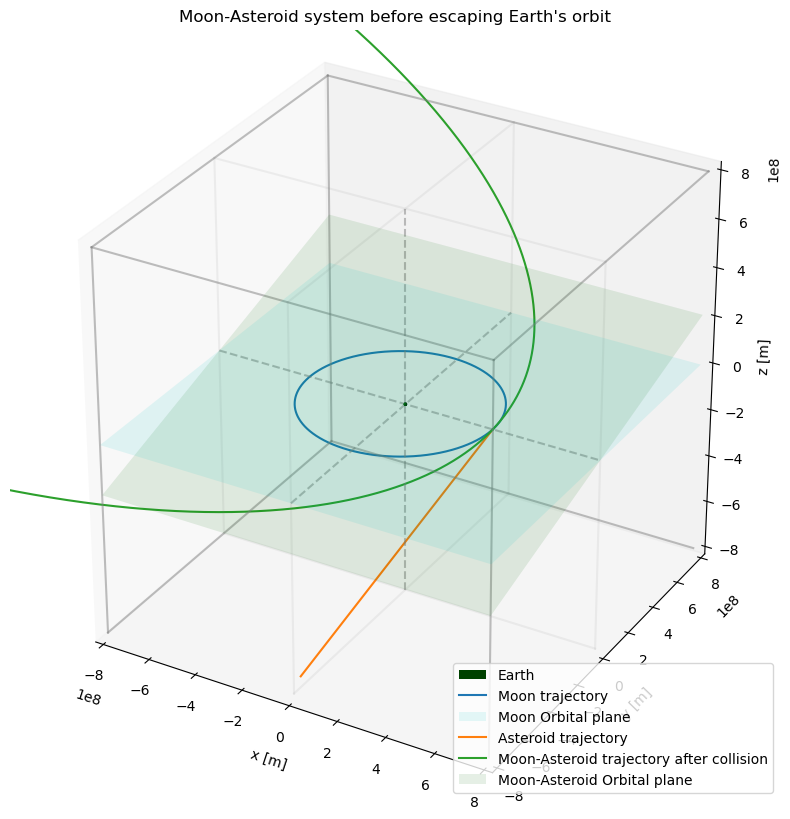

Initial asteroid velocity just before escaping Earth's orbit = 3.8e+05 m/s.


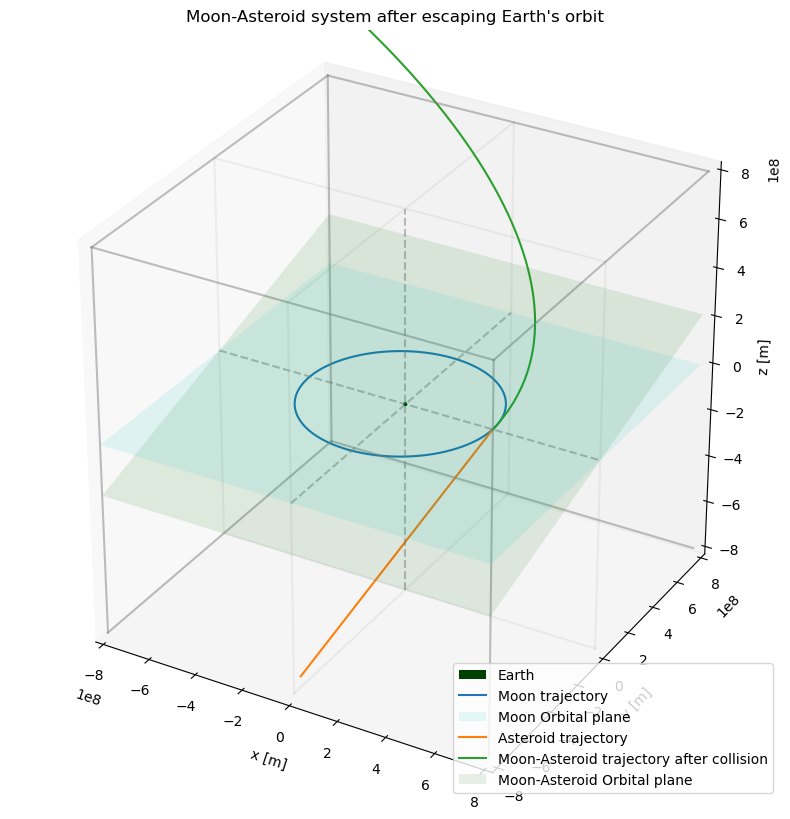

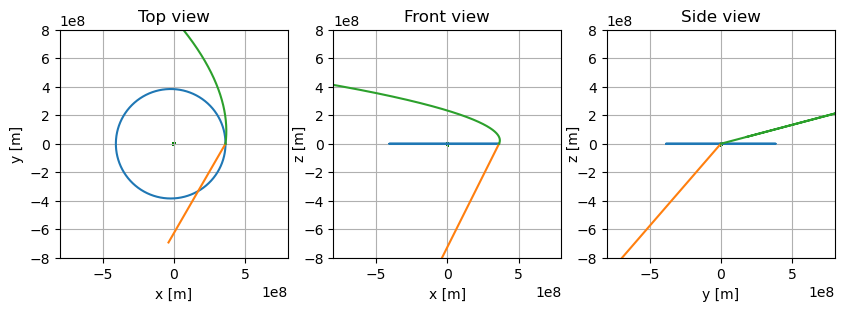

Initial asteroid velocity to make new system reach Earth's escape velocity = 3.85e+05 m/s.
Theoretical initial asteroid velocity to make new system reach Earth's escape velocity =  4.47e+05 m/s.


In [12]:
theta = 30
phi = 45
mass_elastic = 0                     # Fraction of the asteroid mass which does not stick to moon and undergoes scattering
vel_elastic = 0                      # The centre of the scattered mass would move in the - v_a direction in a perfect head on collision. This parameter determines how great the magnitude of the centre of mass velocity as a fraction of v_a
                                     # Values (0 to 1), positive value means scatter moves in -v_a direction

v_a_esc, v_a_esc_therotical = find_esc((theta, phi), (mass_elastic, vel_elastic))

### Sample escape for $\theta = 0°, \phi = 90°$ with $0.5M_{asteroid}$ scattering at average velocity $-0.4v_{asteroid}$

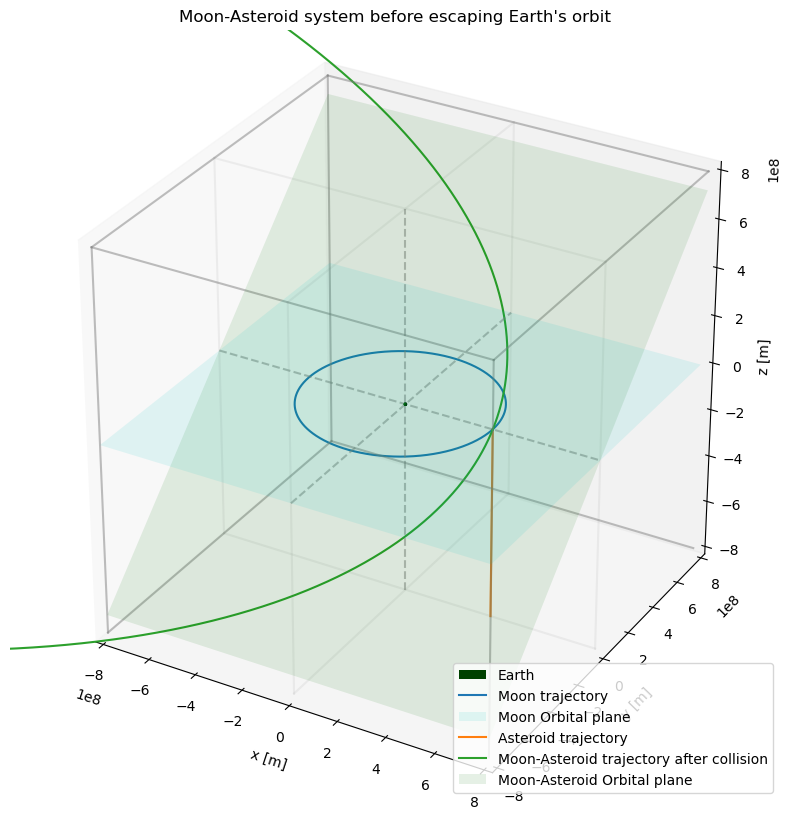

Initial asteroid velocity just before escaping Earth's orbit = 5.96e+05 m/s.


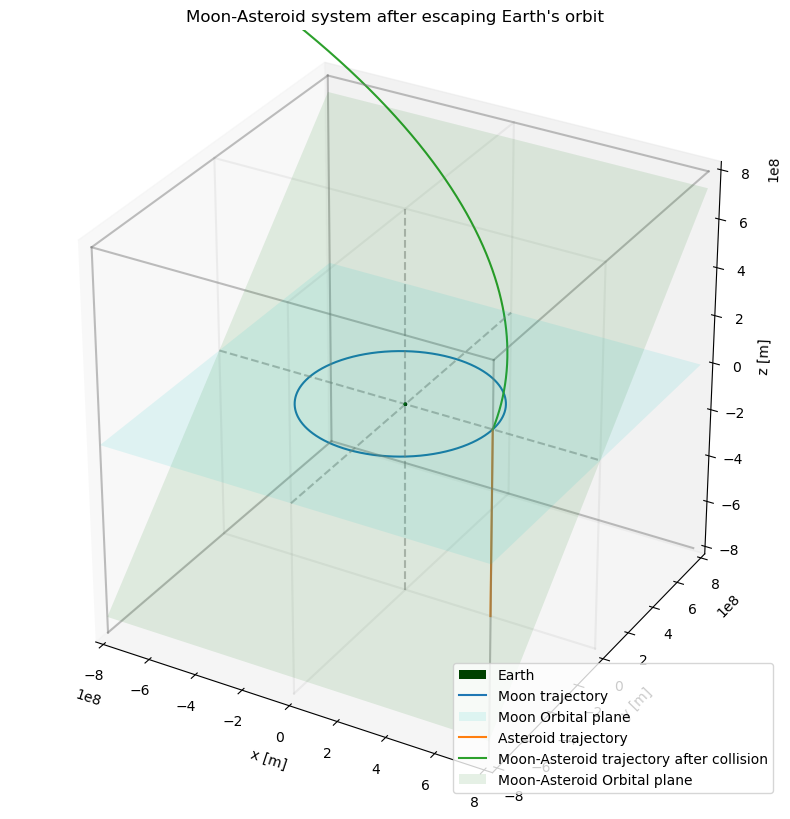

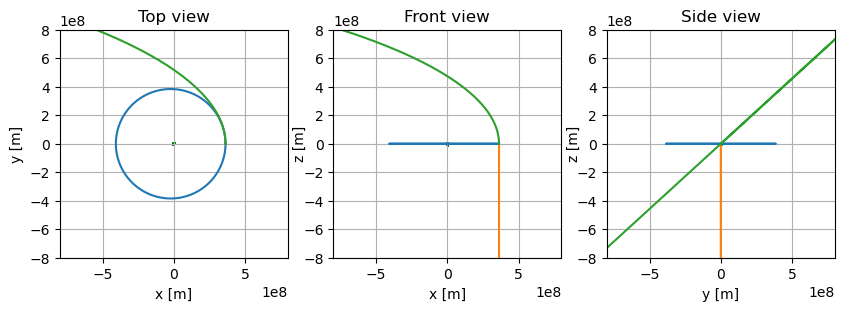

Initial asteroid velocity to make new system reach Earth's escape velocity = 6.03e+05 m/s.
50.0% of the asteroid's mass (equivalent to 5e+19 kg) scatters with an average velocity of 40.0% of the asteroid's velocity (equivalent to 2.41e+05 m/s).
Theoretical initial asteroid velocity to make new system reach Earth's escape velocity =  6.61e+05 m/s.


In [14]:
theta = 0
phi = 90
mass_elastic = 0.5                     # Fraction of the asteroid mass which does not stick to moon and undergoes scattering
vel_elastic = 0.4                      # The centre of the scattered mass would move in the - v_a direction in a perfect head on collision. This parameter determines how great the magnitude of the centre of mass velocity as a fraction of v_a
                                     # Values (0 to 1), positive value means scatter moves in -v_a direction

v_a_esc, v_a_esc_therotical = find_esc((theta, phi), (mass_elastic, vel_elastic))

#### Note:

I have noticed that in almost all cases the system escapes orbit when it's velocity immediately after collision is $1.44$ km/s which is slightly below the predicted escape velocity of $1.52$ km/s. I assume this is mostly due to errors being introduced by the Euler calculations and for a small part due to orbital periods extending for more than $40P_{Moon}$ (unfortunately I cannot reasonably decrease the step size and increase the overall time period while ensuring the Kernel does not crash during the trajectory analysis).

## Data Collection 1

### Changing impact angles for perfectly inelastic collisions

- The minimum required asteroid velocity (with 3sfs) for the new system to escape Earth's orbit will be found for $\theta$ changing in 30° increments and $\phi$ changing in 15° increments.
    - $\theta=90°$ for $\phi = 0°$ is not possible because the asteroid would have collided with Earth before hitting the moon. Instead $\theta = 85°$ was analysed for $\phi = 0°$.
    - Only non-negative $\phi$ values were analysed as the system is perfectly symetric across the moon's orbital plane.

In [13]:
#### Data Collection angles for inelastic collisions
theta_ls = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
theta_ls_0 = [0, 30, 60, 85, 120, 150, 180, 210, 240, 270, 300, 330, 360]

phi_ls_0 = 13 * [0]
phi_ls_15 = 13 * [15]
phi_ls_30 = 13 * [30]
phi_ls_45 = 13 * [45]
phi_ls_60 = 13 * [60]
phi_ls_75 = 13 * [75]
phi_ls_90 = 13 * [90]


v_a_esc_0 = [2.77e+05, 3.07e+05, 4.24e+05, 6.52e+05, 1.21e+06, 1.68e+06, 1.86e+06, 1.67e+06, 1.21e+06, 7.16e+05, 4.24e+05, 3.07e+05, 2.77e+05]
v_a_esc_15 = [2.84e+05, 3.15e+05, 4.32e+05, 7.18e+05, 1.2e+06, 1.64e+06, 1.82e+06, 1.64e+06, 1.19e+06, 7.16e+05, 4.31e+05, 3.14e+05, 2.84e+05]
v_a_esc_30 = [3.07e+05, 3.38e+05, 4.53e+05, 7.18e+05, 1.14e+06, 1.52e+06, 1.68e+06, 1.52e+06, 1.14e+06, 7.16e+05, 4.53e+05, 3.38e+05, 3.07e+05]
v_a_esc_45 = [3.51e+05, 3.81e+05, 4.91e+05, 7.18e+05, 1.05e+06, 1.35e+06, 1.47e+06, 1.35e+06, 1.05e+06, 7.18e+05, 4.91e+05, 3.81e+05, 3.51e+05]
v_a_esc_60 = [4.27e+05, 4.57e+05, 5.5e+05, 7.24e+05, 9.44e+05, 1.15e+06, 1.22e+06, 1.15e+06, 9.44e+05, 7.24e+05, 5.5e+05, 4.57e+05, 4.27e+05]
v_a_esc_75 = [5.43e+05, 5.62e+05, 6.24e+05, 7.24e+05, 8.32e+05, 9.23e+05, 9.55e+05, 9.23e+05, 8.32e+05, 7.24e+05, 6.24e+05, 5.62e+05, 5.43e+05]
v_a_esc_90 = 13 * [7.24e+05]

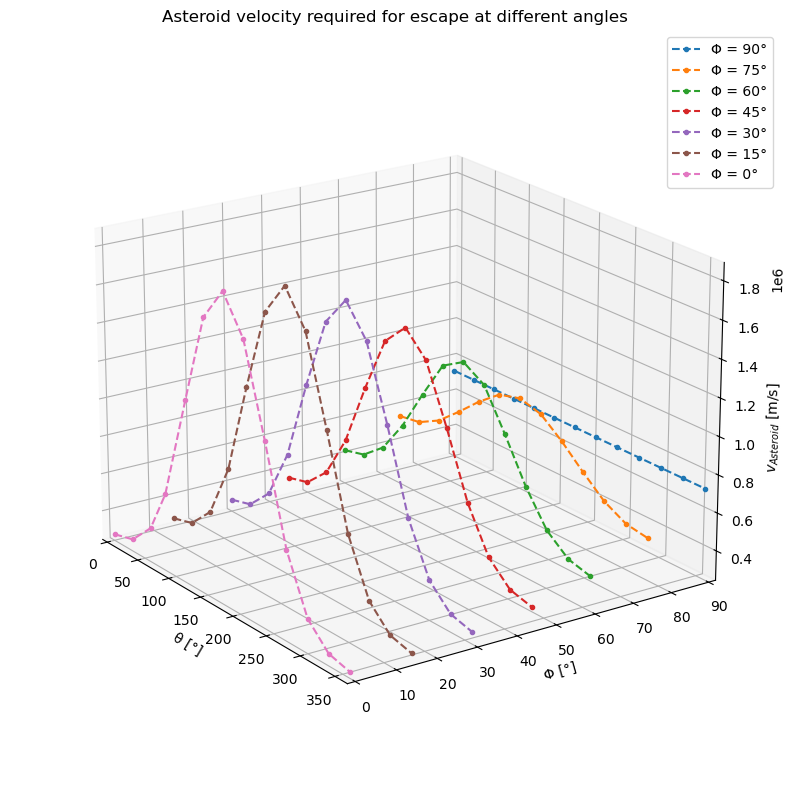

In [14]:
ax = plt.figure(figsize = (10,10)).add_subplot(111, projection='3d')
ax.view_init(elev=20., azim=-35)
ax.plot(theta_ls, phi_ls_90, v_a_esc_90, marker=".", linestyle="--", label = "Φ = 90°")
ax.plot(theta_ls, phi_ls_75, v_a_esc_75, marker=".", linestyle="--", label = "Φ = 75°")
ax.plot(theta_ls, phi_ls_60, v_a_esc_60, marker=".", linestyle="--", label = "Φ = 60°")
ax.plot(theta_ls, phi_ls_45, v_a_esc_45, marker=".", linestyle="--", label = "Φ = 45°")
ax.plot(theta_ls, phi_ls_30, v_a_esc_30, marker=".", linestyle="--", label = "Φ = 30°")
ax.plot(theta_ls, phi_ls_15, v_a_esc_15, marker=".", linestyle="--", label = "Φ = 15°")
ax.plot(theta_ls_0, phi_ls_0, v_a_esc_0, marker=".", linestyle="--", label = "Φ = 0°")
ax.set_xlabel("θ [°]")
ax.set_ylabel("Φ [°]")
ax.set_zlabel(r"$v_{Asteroid}$ [m/s]", labelpad=3)
ax.set_title(f"Asteroid velocity required for escape at different angles")
ax.set_xlim(0, 360)
ax.set_ylim(0, 90)


ax.set_box_aspect(None, zoom=0.9)

ax.legend()
ax.grid()
plt.show()

### Analysis

For constant $\phi$:
- When changing the angle of $\theta$ we notice that the smallest asteroid velocity required occurs at $\theta=0$° which is expected as the asteroid only needs to increase the system's velocity by a factor of $\sqrt{2}$ in the same direction the moon is already travelling in. The largest asteroid velocity is required at $\theta = 180$° when the asteroid needs to have enough velocity to bring the whole system to rest and then accelerate it in the other direction until it reaches escape velocity. (More of this in Appendix 1)
- For the most part every angle has an angle equally far away from the $\theta = 180$° where the magnitude of the required asteroid velocity is the same. This can be explained as the direction of the velocity after collision does not matter. Therefore, for any incoming angle there is another incoming angle with the same speed required for the system to escape orbit after collision. The plot does show some practical limitations to this however. For $\theta = 90° (\phi = 0°)$ the asteroid would have collided with Earth before hitting the moon which is why the measurement was conducted at $\theta = 85°$. And for $\theta = 120°$, $240°$ the resulting system comes very close to Earth although not colliding with it (it is possible to make the moon collide with Earth (Earth is shown to scale) in which case the simulation would break). This passby results in very large accelerations modelled inaccurately by the Euler code with the choosen step size which explains why the required velocity for those two values differ.

For constant $\theta$:
- The smallest asteroid velocity required is at $\phi = 0°$ for the same reasons as explained above. The largest velocity is required at $\phi = 90°$ as the resulting velocity will be the lowest when two objects collide perpendicularly.

General analysis:

- At $\phi = 90°$ the $\theta$ component has no influence on the impact angle of the asteroid.

## Data Collection 2

### Changing Elasticity parameters for collisions with $\theta = \phi = 0°$

- The minimum required asteroid velocity (with 3sfs) for the new system to escape Earth's orbit will be found for both $M_{elastic}$ and $v_{elastic}$ changing in intervals of 0.2.
    - $M_{elastic} = v_{elastic} = 1$ is not possible as kinetic energy would increase after the collision and as such is not graphed below.

In [3]:
#### Data Collection elastic collisions for theta=phi=0°

vel_elastic_ls = [0, 0.2, 0.4, 0.6, 0.8, 1]
vel_elastic_ls_10 = [0, 0.2, 0.4, 0.6, 0.8]

mass_elastic_ls_0 = [0]
mass_elastic_ls_02 = 6 * [0.2]
mass_elastic_ls_04 = 6 * [0.4]
mass_elastic_ls_06 = 6 * [0.6]
mass_elastic_ls_08 = 6 * [0.8]
mass_elastic_ls_10 = 5 * [1]

v_a_esc_0 = [2.77e+05]
v_a_esc_02 = [2.77e+05, 2.66e+05, 2.56e+05, 2.47e+05, 2.39e+05, 2.31e+05]
v_a_esc_04 = [2.77e+05, 2.56e+05, 2.38e+05, 2.23e+05, 2.09e+05, 1.97e+05]
v_a_esc_06 = [2.76e+05, 2.47e+05, 2.23e+05, 2.03e+05, 1.87e+05, 1.73e+05]
v_a_esc_08 = [2.76e+05, 2.38e+05, 2.09e+05, 1.86e+05, 1.68e+05, 1.53e+05]
v_a_esc_10 = [2.75e+05, 2.3e+05, 1.97e+05, 1.72e+05, 1.53e+05]

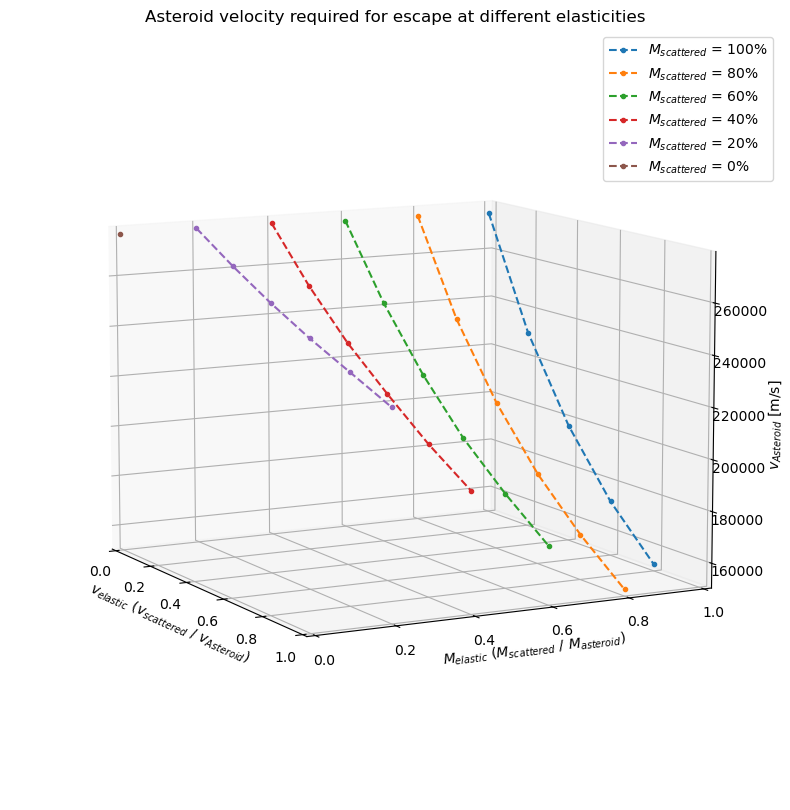

In [5]:
ax = plt.figure(figsize = (10,10)).add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=-28)
ax.plot(vel_elastic_ls_10, mass_elastic_ls_10, v_a_esc_10, marker=".", linestyle="--", label = r"$M_{scattered}$ = 100%")
ax.plot(vel_elastic_ls, mass_elastic_ls_08, v_a_esc_08, marker=".", linestyle="--", label = r"$M_{scattered}$ = 80%")
ax.plot(vel_elastic_ls, mass_elastic_ls_06, v_a_esc_06, marker=".", linestyle="--", label = r"$M_{scattered}$ = 60%")
ax.plot(vel_elastic_ls, mass_elastic_ls_04, v_a_esc_04, marker=".", linestyle="--", label = r"$M_{scattered}$ = 40%")
ax.plot(vel_elastic_ls, mass_elastic_ls_02, v_a_esc_02, marker=".", linestyle="--", label = r"$M_{scattered}$ = 20%")
ax.plot([0], mass_elastic_ls_0, v_a_esc_0, marker=".", linestyle="--", label = r"$M_{scattered}$ = 0%")
ax.set_xlabel(r"$v_{elastic}\ (v_{scattered}\ /\ v_{Asteroid})$")
ax.set_ylabel(r"$M_{elastic}\ (M_{scattered}\ /\ M_{asteroid})$")
ax.set_zlabel(r"$v_{Asteroid}$ [m/s]", labelpad=7)
ax.set_title(f"Asteroid velocity required for escape at different elasticities")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)


ax.set_box_aspect(None, zoom=0.9)

ax.legend()
ax.grid()
plt.show()

### Analysis

For constant $v_{elastic}$:
- When increasing $M_{elastic}$ the required incoming asteroid velocity reduces. This can be explained as the mass of the moon-asteroid system actually decreases which means less incoming momentum is required to change the moons velocity to match it's escape velocity.

For constant $M_{elastic}$:
- When increasing $v_{elastic}$ (debris recoils further) the required incoming asteroid velocity reduces as well. This can be explained as there is a momentum component in the $-v_{asteroid}$ direction (from the debris) after the collision which means the momentum component in the $v_{asteroid}$ direction (from the new moon-asteroid system) must increase to ensure momentum conservation.


General analysis:

- When both $M_{elastic}$ and $v_{elastic}$ equal 1, the total amount of kinetic energy would actually increase after the collision which is why the point is not displayed on the graph. Even some of the other points might not be very realistic as kinetic energy is almost conserved which is incredibly unlikely in a high-speed collision of massive objects.

- For reference a perfectly inelastic collision with $M_{elastic} = 0$ is also shown. It will need the greatest incoming asteroid velocity for the reasons mentioned above.

## Conclusion

- For inelastic collisions, the required speed of the asteroid is minimised to $2.77\times10^5$ m/s for $\theta, \phi = 0°$ and maximised to $1.86\times10^6$ m/s for $\theta=180°$ and $\phi = 0°$. As $\phi$ increases (or decreases due to symmetry) the required speed begins to stabilise so that changing $\theta$ has less of an influence until the speed reaches $7.24\times10^5$ m/s at $\phi = \pm 90°$ for all $\theta$.
- When elasticity is taken into account (and $\theta, \phi = 0°$), the required asteroid speed always decreases from the inelastic scenario until reaching a minimum of $1.53\times10^5$ m/s at two different instances ($v_{elastic} = 0.8, M_{elastic} = 1$ and $v_{elastic} = 1, M_{elastic} = 0.8$).
- This concludes that the minimum Asteroid speed must be between $1.53\times10^5$ m/s and $1.86\times10^6$ m/s when colliding with the Moon to knock it out of orbit, with the variability introduced from different impact angles and different elasticity behaviour during impact.

## References

[1] NASA. (n.d.). Moon fact sheet. NASA Science: National Space Science Data Center. Retrieved December 5, 2024, from https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html

[2] Wikipedia contributors. (n.d.). Ceres (dwarf planet). In Wikipedia. Retrieved December 5, 2024, from https://en.wikipedia.org/wiki/Ceres_(dwarf_planet)

[3] Wikipedia contributors. (n.d.). Orbit of the Moon. In Wikipedia. Retrieved December 5, 2024, from https://en.wikipedia.org/wiki/Orbit_of_the_Moon

[4] Matplotlib. (n.d.). Mplot3d. Matplotlib documentation. Retrieved December 5, 2024, from https://matplotlib.org/stable/gallery/mplot3d/index.html

[5] NumPy. (n.d.). The fundamental package for scientific computing with Python. Retrieved December 5, 2024, from https://numpy.org/